In [1]:
!pip install gurobipy


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 12.9 MB 5.3 MB/s 


In [2]:
from google.colab import drive
drive.mount('/content/gdrive/')

Mounted at /content/gdrive/


In [3]:

import os
import sys
# path = os.path.dirname(os.getcwd())
# sys.path.insert(0, path)

sys.path.append('/content/gdrive/MyDrive/SVR_Codes/SVR_CG')
from Codes.model import *
from Codes.utils import *

from scipy import stats
import pickle
sys.path.append('/content/gdrive/MyDrive/SVR_Codes/DatasetsResult')
RESULT_DIR = "/content/gdrive/MyDrive/SVR_Codes/DatasetsResult"

sys.path.append('/content/gdrive/MyDrive/SVR_Codes/Datasets')
DATA_DIR = "/content/gdrive/MyDrive/SVR_Codes/Datasets"

sys.path.append('/content/gdrive/MyDrive/SVR_Codes/DatasetsInfo')
DATAINFO_DIR = "/content/gdrive/MyDrive/SVR_Codes/DatasetsInfo"

import warnings
warnings.filterwarnings("ignore")

from sklearn import datasets

from sklearn.preprocessing import StandardScaler



In [ ]:
df = pd.read_csv(os.path.join(DATA_DIR, 'airfoil_self_noise.dat'), header=None, sep="\t") 


In [ ]:
df

,0,1,2,3,4,5
0,800,0.0,0.3048,71.3,0.002663,126.201
1,1000,0.0,0.3048,71.3,0.002663,125.201
2,1250,0.0,0.3048,71.3,0.002663,125.951
3,1600,0.0,0.3048,71.3,0.002663,127.591
4,2000,0.0,0.3048,71.3,0.002663,127.461
...,...,...,...,...,...,...
1498,2500,15.6,0.1016,39.6,0.052849,110.264
1499,3150,15.6,0.1016,39.6,0.052849,109.254
1500,4000,15.6,0.1016,39.6,0.052849,106.604
1501,5000,15.6,0.1016,39.6,0.052849,106.224


In [4]:
df = pd.read_csv(os.path.join(DATA_DIR, 'airfoil_self_noise.dat'), header=None, sep="\t") 

f = 5
K = 4
X = df.iloc[:,0:f]
y = df.iloc[:,f:f+1]

cols = [ 'X' + str(i+1) for i in range(f) ]
cols+=['Y']

scaler = StandardScaler()
df_data = scaler.fit_transform(np.c_[X,y])
df_data = pd.DataFrame(df_data, columns = cols)



In [5]:
df_data

,X1,X2,X3,X4,X5,Y
0,-0.662023,-1.146403,1.799299,1.312935,-0.644805,0.197939
1,-0.598561,-1.146403,1.799299,1.312935,-0.644805,0.052935
2,-0.519235,-1.146403,1.799299,1.312935,-0.644805,0.161688
3,-0.408177,-1.146403,1.799299,1.312935,-0.644805,0.399494
4,-0.281255,-1.146403,1.799299,1.312935,-0.644805,0.380644
...,...,...,...,...,...,...
1498,-0.122601,1.490443,-0.373740,-0.723345,3.172773,-2.112990
1499,0.083648,1.490443,-0.373740,-0.723345,3.172773,-2.259444
1500,0.353359,1.490443,-0.373740,-0.723345,3.172773,-2.643705
1501,0.670666,1.490443,-0.373740,-0.723345,3.172773,-2.698806


In [ ]:

# EM Greedy

weights_list_greedy = []
bias_list_greedy = []
metrics_list = []
time_list=[]
epsVal_list = []

for j in range(10):
    seed = np.random.randint(2**8)
    greedy = CLR(K =K , f = f, max_iter= 30, compute = True, random_state=seed )
    greedy.set_model(Cl_SVR_greedy(Kmeans_init = False, outputFlag=False, tol = 0.05, time = 0.5, step_plots=False))

    greedy.fit(df_data )


    time_list.append(greedy.run_time) 
    epsVal_list.append(greedy.model_optVal)
    weights_list_greedy.append(greedy.weights)
    bias_list_greedy.append(greedy.bias)


print("\n\nResults for EM Greedy" )

print('\nMean, sd, low_ci, high_ci')


epsVal_ci_low, epsVal_ci_high = stats.t.interval(0.95, len(epsVal_list)-1, loc=np.mean(epsVal_list), scale=stats.sem(epsVal_list))
epsVal_result_greedy = [np.mean(epsVal_list), np.std(epsVal_list), epsVal_ci_low, epsVal_ci_high]
print("EpsVal for EM Greedy: ", epsVal_result_greedy)


time_result_greedy = np.mean(time_list)
print("Average time taken for EM Greedy ", time_result_greedy, "\n")

Clusterwise-Regression model with SVR - Greedy algorithm
# of outliers:  0
Iteration:  0
Set parameter WLSAccessID
Set parameter WLSSecret
Set parameter LicenseID to value 874321
Academic license - for non-commercial use only - registered to aravinth.chembu@mail.utoronto.ca
Set parameter TimeLimit to value 30
Set parameter MIPGap to value 0.05
Academic license - for non-commercial use only - registered to aravinth.chembu@mail.utoronto.ca
Set parameter WLSAccessID
Set parameter WLSSecret
Set parameter LicenseID to value 874321
Academic license - for non-commercial use only - registered to aravinth.chembu@mail.utoronto.ca
Set parameter TimeLimit to value 30
Set parameter MIPGap to value 0.05
Academic license - for non-commercial use only - registered to aravinth.chembu@mail.utoronto.ca
Set parameter WLSAccessID
Set parameter WLSSecret
Set parameter LicenseID to value 874321
Academic license - for non-commercial use only - registered to aravinth.chembu@mail.utoronto.ca
Set parameter TimeL

In [ ]:

# KM LR Greedy

weights_list_kmlr = []
bias_list_kmlr = []
time_list=[]
epsVal_list = []

for j in range(10):
    seed = np.random.randint(2**8)

    kmlr = CLR(K =K , f = f, random_state=seed )
    kmlr.set_model(km_lr())
    kmlr.fit(df_data )

    time_list.append(kmlr.run_time) 
    epsVal_list.append(kmlr.model_optVal)
    weights_list_kmlr.append(kmlr.weights)
    bias_list_kmlr.append(kmlr.bias)


print("\n\nResults for kmlr" )

print('\nMean, sd, low_ci, high_ci')


epsVal_ci_low, epsVal_ci_high = stats.t.interval(0.95, len(epsVal_list)-1, loc=np.mean(epsVal_list), scale=stats.sem(epsVal_list))
epsVal_result_kmlr = [np.mean(epsVal_list), np.std(epsVal_list), epsVal_ci_low, epsVal_ci_high]
print("EpsVal for kmlr: ", epsVal_result_kmlr)


time_result_kmlr = np.mean(time_list)
print("Average time taken for kmlr ", time_result_kmlr, "\n")

Clusterwise-Regression model with KM+LR algorithm
# of outliers:  0
MaxError:  2.7674371920091723
Clusterwise-Regression model with KM+LR algorithm
# of outliers:  0
MaxError:  2.7828700940714626
Clusterwise-Regression model with KM+LR algorithm
# of outliers:  0
MaxError:  2.766895281518305
Clusterwise-Regression model with KM+LR algorithm
# of outliers:  0
MaxError:  2.7828700940714626
Clusterwise-Regression model with KM+LR algorithm
# of outliers:  0
MaxError:  2.7674371920091723
Clusterwise-Regression model with KM+LR algorithm
# of outliers:  0
MaxError:  2.7674371920091723
Clusterwise-Regression model with KM+LR algorithm
# of outliers:  0
MaxError:  2.7674371920091723
Clusterwise-Regression model with KM+LR algorithm
# of outliers:  0
MaxError:  2.7674371920091723
Clusterwise-Regression model with KM+LR algorithm
# of outliers:  0
MaxError:  2.7674371920091723
Clusterwise-Regression model with KM+LR algorithm
# of outliers:  0
MaxError:  2.7828700940714626


Results for kmlr

M

In [8]:

# KM SVR Greedy

weights_list_kmsvr = []
bias_list_kmsvr = []
metrics_list = []
time_list=[]
epsVal_list = []

for j in range(10):
    seed = np.random.randint(2**8)
    print(seed)
    kmsvr = CLR(K =K , f = f, random_state=seed )
    kmsvr.set_model(km_svr(epsilon = 2))
    kmsvr.fit(df_data )

    time_list.append(kmsvr.run_time) 
    epsVal_list.append(kmsvr.model_optVal)
    weights_list_kmsvr.append(kmsvr.weights)
    bias_list_kmsvr.append(kmsvr.bias)


print("\n\nResults for kmsvr" )

print('\nMean, sd, low_ci, high_ci')


epsVal_ci_low, epsVal_ci_high = stats.t.interval(0.95, len(epsVal_list)-1, loc=np.mean(epsVal_list), scale=stats.sem(epsVal_list))
epsVal_result_kmsvr = [np.mean(epsVal_list), np.std(epsVal_list), epsVal_ci_low, epsVal_ci_high]
print("EpsVal for kmsvr ", epsVal_result_kmsvr)


time_result_kmsvr = np.mean(time_list)
print("Average time taken for kmsvr ", time_result_kmsvr, "\n")

120
Clusterwise-Regression model with KM+SVR algorithm
# of outliers:  0
MaxError:  2.3022760054493516
158
Clusterwise-Regression model with KM+SVR algorithm
# of outliers:  0
MaxError:  2.3022760054493516
90
Clusterwise-Regression model with KM+SVR algorithm
# of outliers:  0
MaxError:  2.3022760054493516
173
Clusterwise-Regression model with KM+SVR algorithm
# of outliers:  0
MaxError:  2.3022760054493516
178
Clusterwise-Regression model with KM+SVR algorithm
# of outliers:  0
MaxError:  2.3022760054493516
108
Clusterwise-Regression model with KM+SVR algorithm
# of outliers:  0
MaxError:  2.3022760054493516
74
Clusterwise-Regression model with KM+SVR algorithm
# of outliers:  0
MaxError:  2.3022760054493516
195
Clusterwise-Regression model with KM+SVR algorithm
# of outliers:  0
MaxError:  2.3022760054493516
122
Clusterwise-Regression model with KM+SVR algorithm
# of outliers:  0
MaxError:  2.3022760054493516
254
Clusterwise-Regression model with KM+SVR algorithm
# of outliers:  0
Ma

In [ ]:

# kplane Greedy

weights_list_kp = []
bias_list_kp = []
time_list = []
epsVal_list = []

for j in range(10):
    seed = np.random.randint(2**8)

    kp = CLR(K =K , f = f, max_iter= 20, random_state=seed )
    kp.set_model(k_plane())
    kp.fit(df_data )

    time_list.append(kp.run_time) 
    epsVal_list.append(kp.model_optVal)
    weights_list_kp.append(kp.weights)
    bias_list_kp.append(kp.bias)


print("\n\nResults for k plane" )

print('\nMean, sd, low_ci, high_ci')


epsVal_ci_low, epsVal_ci_high = stats.t.interval(0.95, len(epsVal_list)-1, loc=np.mean(epsVal_list), scale=stats.sem(epsVal_list))
epsVal_result_kp = [np.mean(epsVal_list), np.std(epsVal_list), epsVal_ci_low, epsVal_ci_high]
print("EpsVal for k plane: ", epsVal_result_kp)


time_result_kp = np.mean(time_list)
print("Average time taken for k plane ", time_result_kp, "\n")

Clusterwise-Regression model with KM+LR algorithm
# of outliers:  0
MaxError:  1.1341531733494257
Clusterwise-Regression model with KM+LR algorithm
# of outliers:  0
MaxError:  1.1304424084750904
Clusterwise-Regression model with KM+LR algorithm
# of outliers:  0
MaxError:  1.1363081935447288
Clusterwise-Regression model with KM+LR algorithm
# of outliers:  0
MaxError:  1.2828156538538393
Clusterwise-Regression model with KM+LR algorithm
# of outliers:  0
MaxError:  1.3519669860392272
Clusterwise-Regression model with KM+LR algorithm
# of outliers:  0
MaxError:  1.1800417784487598
Clusterwise-Regression model with KM+LR algorithm
# of outliers:  0
MaxError:  1.2943368407413307
Clusterwise-Regression model with KM+LR algorithm
# of outliers:  0
MaxError:  1.3497394865748529
Clusterwise-Regression model with KM+LR algorithm
# of outliers:  0
MaxError:  1.2160565760820652
Clusterwise-Regression model with KM+LR algorithm
# of outliers:  0
MaxError:  0.9733936969293029


Results for k plan

In [ ]:

# Clusterwise SVR with constraint generation 

optcg = CLR(K =K , f = f, max_iter= 30, compute = True, random_state=243)
optcg.set_model(Cl_SVR_Cg(outputFlag=False, initConstrCnt=15, optimalGap= 0.05, tol = 0.2, time = 2, initConstrIntRatio= 4, outliersCnt = 0, step_plots=False))

optcg.fit(df_data )


weights_optcg = optcg.weights
bias_optcg = optcg.bias
optgap_optcg = optcg.model_optGap
optVal_optcg = optcg.model_optVal


print("\n\nResults for CG" )

print("EpsVal for CG: ", optVal_optcg)

time_result_optcg = optcg.run_time
print("Time taken for CG ", time_result_optcg, "\n")


Clusterwise-Regression model with SVR - Constraint generation
# of outliers:  0
greedy objective:  0.1958424374523223
greedy objective:  0.18979963871528274
greedy objective:  0.45548882264705176
greedy objective:  0.4446069878498265
greedy objective kmlr:  0.48636385383960634
Max error for warm starting model:  1.1191765407087524
Number of WS constraints:  72
Set parameter WLSAccessID
Set parameter WLSSecret
Set parameter LicenseID to value 874321
Academic license - for non-commercial use only - registered to aravinth.chembu@mail.utoronto.ca
w at WS:  [[-1.13971518  0.69279356  0.25587818  0.74228671 -0.58469815]
 [-1.08356337  0.47166548 -0.06085893 -0.03615688 -0.61467902]
 [-0.58987653 -1.48191664 -0.53237478  0.26684485  1.16741266]
 [-0.40336329 -0.52316402 -0.97104551  0.11688542 -0.51844763]]
b at WS:  [[-0.35391764]
 [ 0.00177486]
 [-0.24092094]
 [-0.22906401]]
Set parameter TimeLimit to value 120
Set parameter MIPGap to value 0.05
Academic license - for non-commercial use onl

Clusterwise-Regression model with SVR - MILP
# of outliers:  0
greedy objective:  0.19542049783159332
greedy objective:  0.1947950446073145
greedy objective:  0.4399562304366456
greedy objective:  0.42068453460384875
greedy objective kmlr:  0.48636385383960634
Max error for warm starting model:  1.3841759192353829
Set parameter WLSAccessID
Set parameter WLSSecret
Set parameter LicenseID to value 874321
Academic license - for non-commercial use only - registered to aravinth.chembu@mail.utoronto.ca
w at WS:  [[-1.32691473 -0.23488585 -0.59718508  0.39709002 -0.62342262]
 [-0.77296736  0.66839683  0.0732544  -0.0689421  -0.73650301]
 [-0.43505597 -1.16060488 -0.63969804  0.32405898  0.58562312]
 [-0.43484455 -1.14158532 -0.89504103  0.35139359  0.53212726]]
b at WS:  [[ 0.21139665]
 [-0.00524661]
 [-0.63243242]
 [ 0.26307422]]
Set parameter TimeLimit to value 600
Set parameter MIPGap to value 0.1
Academic license - for non-commercial use only - registered to aravinth.chembu@mail.utoronto.

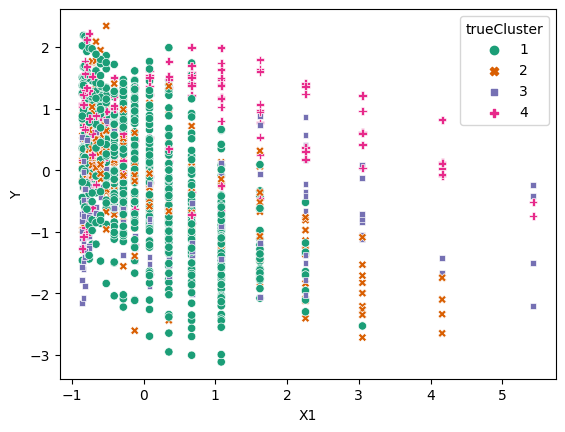

Solution reached with Cost:  0.7924792170717109


Results for full MILP
EpsVal for full MILP:  0.7924792170717109
Time taken for full MILP  600.270668395 



In [ ]:

# Clusterwise SVR with full MILP

optmilp = CLR(K =K , f = f,compute = True, random_state=243)
optmilp.set_model(Cl_SVR_milp(outputFlag=False, WarmStart=True, optimalGap= 0.1, time = 10))

optmilp.fit(df_data )

weights_optmilp = optmilp.weights
bias_optmilp = optmilp.bias
optgap_optmilp= optmilp.model_optGap
optVal_optmilp = optmilp.model_optVal


print("\n\nResults for full MILP" )

print("EpsVal for full MILP: ", optVal_optmilp)

time_result_optmilp = optmilp.run_time
print("Time taken for full MILP ", time_result_optmilp, "\n")


Clusterwise-Regression model with SVR - MILP
# of outliers:  0
greedy objective kmlr:  0.48636385383960634
Best WS is kmlr
Max error for warm starting model:  2.7828700940714626
Set parameter WLSAccessID
Set parameter WLSSecret
Set parameter LicenseID to value 874321
Academic license - for non-commercial use only - registered to aravinth.chembu@mail.utoronto.ca
w at WS:  [[-1.04503014 -0.00590245 -0.23148237  0.22985657 -0.30723006]
 [-1.00671736 -0.37565644 -0.50808075  0.24495886 -0.30133482]
 [-0.34370145 -0.48082765 -0.54686792  0.21715908  0.35879175]
 [-0.33426044 -0.61554441 -0.81078043  0.19984773 -0.95646997]]
b at WS:  [[-0.15597079]
 [-0.11188418]
 [ 0.24031391]
 [-1.10246316]]
Set parameter TimeLimit to value 3363.4124
Set parameter MIPGap to value 0.1
Academic license - for non-commercial use only - registered to aravinth.chembu@mail.utoronto.ca
E:  0.7658840718928912


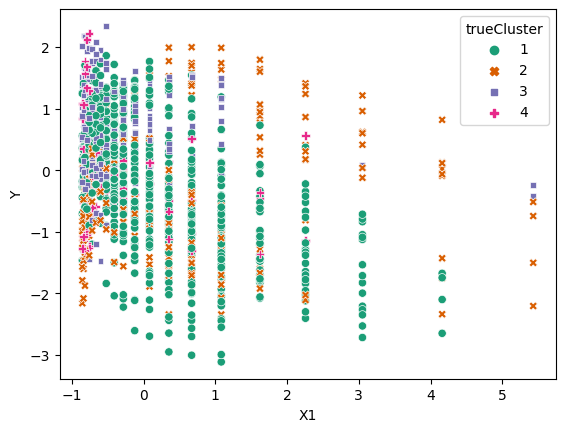

In [9]:

# Clusterwise SVR with full MILP (time of cg)
time_result_optcg = 3363.4124
optmilp = CLR(K =K , f = f,compute = True, random_state=243)
optmilp.set_model(Cl_SVR_milp(outputFlag=False, WarmStart=True, optimalGap= 0.1, time = time_result_optcg/60))

optmilp.fit(df_data )

weights_optmilp = optmilp.weights
bias_optmilp = optmilp.bias
optgap_optmilp= optmilp.model_optGap
optVal_optmilp = optmilp.model_optVal


print("\n\nResults for full MILP" )

print("EpsVal for full MILP: ", optVal_optmilp)

time_result_optmilp = optmilp.run_time
print("Time taken for full MILP ", time_result_optmilp, "\n")


In [11]:


with open(os.path.join(RESULT_DIR, 'Airfoil2.pkl'), 'wb') as outp:

    pickle.dump(weights_list_kmsvr, outp, pickle.HIGHEST_PROTOCOL)
    pickle.dump(bias_list_kmsvr, outp, pickle.HIGHEST_PROTOCOL)
    pickle.dump(time_result_kmsvr, outp, pickle.HIGHEST_PROTOCOL)
    pickle.dump(epsVal_result_kmsvr, outp, pickle.HIGHEST_PROTOCOL)

    pickle.dump(weights_optmilp, outp, pickle.HIGHEST_PROTOCOL)
    pickle.dump(bias_optmilp, outp, pickle.HIGHEST_PROTOCOL)
    pickle.dump(time_result_optmilp, outp, pickle.HIGHEST_PROTOCOL)
    pickle.dump(optgap_optmilp, outp, pickle.HIGHEST_PROTOCOL)
    pickle.dump(optVal_optmilp, outp, pickle.HIGHEST_PROTOCOL)


In [ ]:

# Save the final results 


with open(os.path.join(RESULT_DIR, 'Airfoil.pkl'), 'wb') as outp:



    pickle.dump(weights_list_greedy, outp, pickle.HIGHEST_PROTOCOL)
    pickle.dump(bias_list_greedy, outp, pickle.HIGHEST_PROTOCOL)
    pickle.dump(time_result_greedy, outp, pickle.HIGHEST_PROTOCOL)
    pickle.dump(epsVal_result_greedy, outp, pickle.HIGHEST_PROTOCOL)

    pickle.dump(weights_list_kmlr, outp, pickle.HIGHEST_PROTOCOL)
    pickle.dump(bias_list_kmlr, outp, pickle.HIGHEST_PROTOCOL)
    pickle.dump(time_result_kmlr, outp, pickle.HIGHEST_PROTOCOL)
    pickle.dump(epsVal_result_kmlr, outp, pickle.HIGHEST_PROTOCOL)
    
    pickle.dump(weights_list_kp, outp, pickle.HIGHEST_PROTOCOL)
    pickle.dump(bias_list_kp, outp, pickle.HIGHEST_PROTOCOL)
    pickle.dump(time_result_kp, outp, pickle.HIGHEST_PROTOCOL)
    pickle.dump(epsVal_result_kp, outp, pickle.HIGHEST_PROTOCOL)

    pickle.dump(weights_optcg, outp, pickle.HIGHEST_PROTOCOL)
    pickle.dump(bias_optcg, outp, pickle.HIGHEST_PROTOCOL)
    pickle.dump(time_result_optcg, outp, pickle.HIGHEST_PROTOCOL)
    pickle.dump(optgap_optcg, outp, pickle.HIGHEST_PROTOCOL)
    pickle.dump(optVal_optcg, outp, pickle.HIGHEST_PROTOCOL)

    pickle.dump(weights_optmilp, outp, pickle.HIGHEST_PROTOCOL)
    pickle.dump(bias_optmilp, outp, pickle.HIGHEST_PROTOCOL)
    pickle.dump(time_result_optmilp, outp, pickle.HIGHEST_PROTOCOL)
    pickle.dump(optgap_optmilp, outp, pickle.HIGHEST_PROTOCOL)
    pickle.dump(optVal_optmilp, outp, pickle.HIGHEST_PROTOCOL)



n, d = X.shape

with open(os.path.join(DATAINFO_DIR, 'Airfoil.pkl'), 'wb') as outp:

    pickle.dump(n, outp, pickle.HIGHEST_PROTOCOL)
    pickle.dump(d, outp, pickle.HIGHEST_PROTOCOL)
    pickle.dump(K, outp, pickle.HIGHEST_PROTOCOL)



NameError: ignored